## PROJETO ICD - World Press Freedom Score

### Participantes:

- CLEYDSON DE SOUZA FERREIRA JUNIOR
- FELIPE GONTIJO SIQUEIRA
- MARIANA DA SILVA MARTINS

### Motivação e Objetivos da análise
Pós ano de eleições, com a vinculação de noticias a todo vapor, foi possivel vivenciar e observar a maneira qual a sociedade trata os profissionais da área jornalistica. Além disso, diante os constantes ataques contra os canais midiaticos e a crescente guerra cultural e retórica do ódio no Brasil, surgiu a necessidade de comparação com o restante do globo para analisar e compreender se esses eventos se dão apenas no nosso país ou se essa onda de ódio tem tomado conta de todo o mundo.

###  Perguntas 

<div class = 'alert alert-block alert-info'>
    <p>1. A média de liberdade aumenta ou diminui conforme a segurança do país? <br>
    2. Como o fator econômico influencia o contexto sociocultural e o de segurança? <br>
    3. O quão relacionados estão os índices de contexto econômico e contexto político? São diretamente ou inversamente proporcionais?</p>
</div>

## Dados Usados

Para o projeto, utilizamos o dataset <a href="https://www.kaggle.com/datasets/arjitgupta00/world-press-freedom-score-20192022">World Press Freedom Score</a> ('Liberdade de imprensa') do kaggle. 
Este é um conjunto de dados composto por **180 países**, no quais foram ranqueado e avaliados em temas como *Abuse Score, Global Score 2019-22 , Political Context, Economic Context, Legal Framework, Safety Score, Sociocultural Context*.

Analizamos os dados e concluiremos o projeto, com o conceito que a liberdade de imprensa é definida como a capacidade dos jornalistas como indivíduos e coletivos de selecionar, produzir e divulgar notícias de interesse público, independentemente de interferência POLÍTICA, ECONÔMICA, LEGAL e SOCIAL e na ausência de ameaças à sua SEGURANÇA física e mental.


In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('World Press Freedom Score.csv')

df = df.set_index('Ranking')

df

,Country,Political Context 2022,Economic Context 2022,Legal Framework 2022,Safety Score 2022,Sociocultural Context 2022,Abuse Score 2021,Underlying Situation Score 2021,Global Score 2022,Global Score 2021,Global Score 2020,Global Score 2019
Ranking,,,,,,,,,,,,
1,Norway,94.89,90.38,92.23,92.03,93.71,0.00,6.72,92.65,6.72,7.84,7.82
2,Denmark,94.34,83.67,89.18,92.97,91.17,0.00,8.57,90.27,8.57,8.13,9.87
3,Sweden,91.96,87.66,90.27,84.14,90.18,0.00,7.24,88.84,7.24,9.25,8.31
4,Estonia,91.11,81.97,87.87,93.20,90.00,0.00,15.25,88.83,15.25,12.61,12.27
5,Finland,90.40,82.03,86.64,92.26,90.77,0.00,6.99,88.42,6.99,7.93,7.90
...,...,...,...,...,...,...,...,...,...,...,...,...
176,Myanmar,40.40,29.25,20.18,4.63,30.67,0.00,31.12,25.03,31.12,30.20,29.00
177,Turkmenistan,25.00,11.73,29.61,35.69,23.00,55.21,41.86,25.01,43.94,42.88,43.98
178,Iran,34.14,21.32,26.71,13.61,23.78,0.00,29.82,23.22,29.82,29.79,29.67


## Pré-processamento 

### Análise geral:
- Durante o estudo das informações concedidas e a análise dos dados disponíveis, foi possível notar uma anomalia em relação a distribuição dos valores do Global Score em 2022, em que os países de niveis mais altos do ranking se enscontravam com scores muito ruins e divergentes dos outros anos. Nesse sentido, para que nossa análise fosse correta e prática, houve a necessidade de inversão da coluna Global Score 2022, afim de que seus valores ficassem na ordem correta na relação.

- Para uma melhor análise, se fez necessário "dropar" os valores nulos de algumas colunas para conseguir tratar os dados com valores faltantes.



In [4]:
a = df.sort_values('Global Score 2022')

a = a['Global Score 2022'].reset_index()

a = a.drop(columns = 'Ranking')

a.index +=1


df['Global Score 2022'] = a

df

,Country,Political Context 2022,Economic Context 2022,Legal Framework 2022,Safety Score 2022,Sociocultural Context 2022,Abuse Score 2021,Underlying Situation Score 2021,Global Score 2022,Global Score 2021,Global Score 2020,Global Score 2019
Ranking,,,,,,,,,,,,
1,Norway,94.89,90.38,92.23,92.03,93.71,0.00,6.72,13.92,6.72,7.84,7.82
2,Denmark,94.34,83.67,89.18,92.97,91.17,0.00,8.57,19.62,8.57,8.13,9.87
3,Sweden,91.96,87.66,90.27,84.14,90.18,0.00,7.24,23.22,7.24,9.25,8.31
4,Estonia,91.11,81.97,87.87,93.20,90.00,0.00,15.25,25.01,15.25,12.61,12.27
5,Finland,90.40,82.03,86.64,92.26,90.77,0.00,6.99,25.03,6.99,7.93,7.90
...,...,...,...,...,...,...,...,...,...,...,...,...
176,Myanmar,40.40,29.25,20.18,4.63,30.67,0.00,31.12,88.42,31.12,30.20,29.00
177,Turkmenistan,25.00,11.73,29.61,35.69,23.00,55.21,41.86,88.83,43.94,42.88,43.98
178,Iran,34.14,21.32,26.71,13.61,23.78,0.00,29.82,88.84,29.82,29.79,29.67


### Análise específica:
- Para obter os dados relacionados ao Brasil, foi necessário fazer uma busca por comparação na coluna "Country" a fim de achar os valores correspondentes ao país, quando obtidos percebeu-se a faltante de "Abuse Score" do ano de 2021 então dropamos tal coluna para que a análise fosse mais limpa. 

In [35]:
brazil = df[df['Country'].str.match('Brazil', na = False)]

a = brazil.drop(columns = ['Abuse Score 2021'])
dfmm = pd.DataFrame(a)
dfmm.set_index("Country").T


Country,Brazil
Political Context 2022,51.62
Economic Context 2022,37.59
Legal Framework 2022,69.74
Safety Score 2022,47.86
Sociocultural Context 2022,70.00
Underlying Situation Score 2021,37.40
Global Score 2022,64.37
Global Score 2021,37.40
Global Score 2020,36.82
Global Score 2019,36.77


- Para otimizar a pesquisa e trazer mais praticidade para a análise definimos uma função para visualização das cluster, relacionado ao elbow method que é uma heurística usada para determinar o número de clusters em um conjunto de dados. Com esse método também conseguimos definir e simplificar a analíse de determinadas colunas da base de dados.

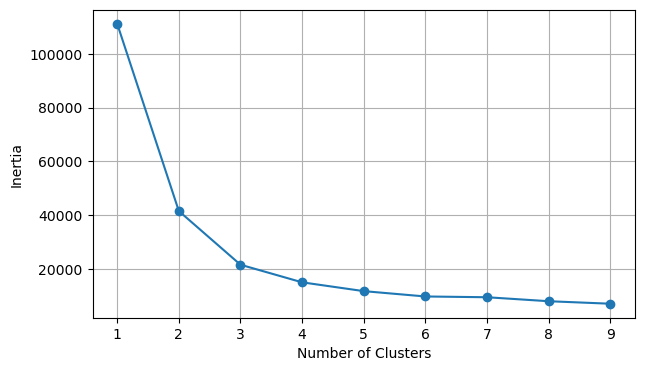

In [13]:
from sklearn.cluster import KMeans
def optimise_kmeans(data, max_k):
    
    means = []
    inertias = []
    
    for k in range(1, max_k):
        
        kmeans = KMeans(n_clusters = k, n_init='auto')
        kmeans.fit(data)
        
        means.append(k)
        inertias.append(kmeans.inertia_)
        
    fig = plt.subplots(figsize = (7, 4))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

optimise_kmeans(df[['Political Context 2022','Legal Framework 2022']], 10) #Political Context 2022 x Legal Framework 2022

## Conclusão 